In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
file = pd.read_csv("/content/drive/MyDrive/Thesis Dataset/CricketThesis.xlsx - merged_data.csv")

In [ ]:
print(file.columns)

Index(['Player Name', 'vsIND', 'vsAUS', 'vsSA', 'vsPAK', 'vsNZ', 'vsENG',
       'vsSL', 'vsAFG', 'vsWI', 'vsSCO', 'vsZIM', 'vsIRE', 'vsNED'],
      dtype='object')


In [ ]:
print(file)

              Player Name      vsIND      vsAUS       vsSA       vsPAK  \
0            Aminul Islam  54.250000  25.302000  25.302000   10.600000   
1            Hasan Mahmud   0.000000   5.443333  15.000000    5.443333   
2            Arafat Sunny   6.666667   6.666667   6.666667    6.666667   
3       Mustafizur Rahman   9.500000   8.416000  13.000000    2.000000   
4             Nasum Ahmed  38.000000   7.000000  19.000000   18.600000   
5           Rubel Hossain   3.400000   0.000000  16.000000   16.000000   
6          Shamim Hossain   1.000000   7.625000   7.625000   13.500000   
7          Shoriful Islam   7.332500   7.332500   8.000000    2.000000   
8            Tanzid Hasan  32.000000  36.000000  12.000000    0.000000   
9               Yasir Ali   4.500000  22.602500  18.250000   40.000000   
10     Mohammad Saifuddin  32.166667  32.166667  16.000000   32.166667   
11       Mosaddek Hossain  10.000000  28.426000  26.000000   16.000000   
12        Mushfiqur Rahim  31.950000  

# ***Finding Elbow point for the value of N ***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

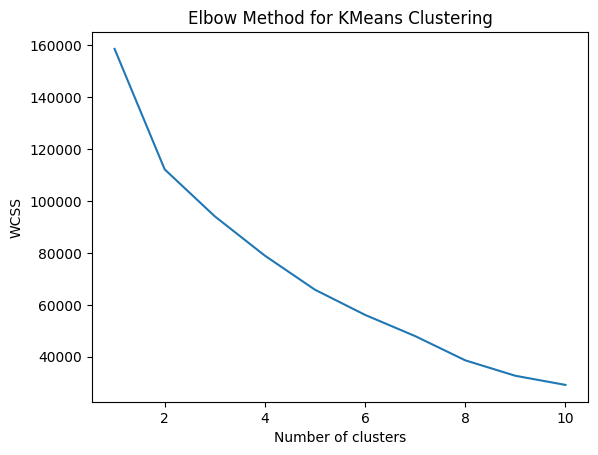

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data= file.iloc[:, 1:]
wcss = []

# Try k=1 to 10 clusters
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

# Identify the elbow point
# (Note: This can be subjective based on the plot)
elbow_point =15

# Use the elbow point for k-means clustering
kmeans = KMeans(n_clusters=elbow_point)
kmeans.fit(data)
labels = kmeans.labels_

# **Silhouette Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

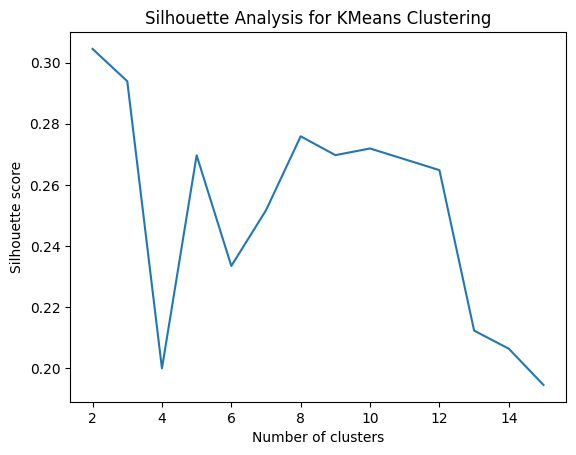

Optimal number of clusters (n) based on silhouette method: 2


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sample data (replace with your data)

# List to store silhouette scores for different k values
silhouette_scores = []

# Try k=2 to 10 clusters
for k in range(2, 16):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data)
  silhouette_score_val = silhouette_score(data, kmeans.labels_)
  silhouette_scores.append(silhouette_score_val)

# Plot the silhouette score vs number of clusters
plt.plot(range(2, 16), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.show()

# Identify the k value with the highest silhouette score
highest_silhouette_score_index = silhouette_scores.index(max(silhouette_scores))
optimal_k = highest_silhouette_score_index + 2  # Since k starts from 2

# Print the optimal number of clusters
print("Optimal number of clusters (n) based on silhouette method:", optimal_k)


# ***Now Clustering***


# ***Kmeans***


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Read data from CSV file
data = file

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])  # Replace 'data' with your DataFrame name if different

# Perform K-means clustering with n=2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # Set random_state for reproducibility
kmeans.fit(numerical_features)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Print cluster labels
print("Cluster labels:", cluster_labels)

# (Optional) Add cluster labels to data
data['cluster'] = cluster_labels

# Print data with cluster labels (optional)
print(data)


Cluster labels: [0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0]
              Player Name      vsIND      vsAUS       vsSA       vsPAK  \
0            Aminul Islam  54.250000  25.302000  25.302000   10.600000   
1            Hasan Mahmud   0.000000   5.443333  15.000000    5.443333   
2            Arafat Sunny   6.666667   6.666667   6.666667    6.666667   
3       Mustafizur Rahman   9.500000   8.416000  13.000000    2.000000   
4             Nasum Ahmed  38.000000   7.000000  19.000000   18.600000   
5           Rubel Hossain   3.400000   0.000000  16.000000   16.000000   
6          Shamim Hossain   1.000000   7.625000   7.625000   13.500000   
7          Shoriful Islam   7.332500   7.332500   8.000000    2.000000   
8            Tanzid Hasan  32.000000  36.000000  12.000000    0.000000   
9               Yasir Ali   4.500000  22.602500  18.250000   40.000000   
10     Mohammad Saifuddin  32.166667  32.166667  16.000000   32.166667   
11       Mosaddek Hossain  10.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


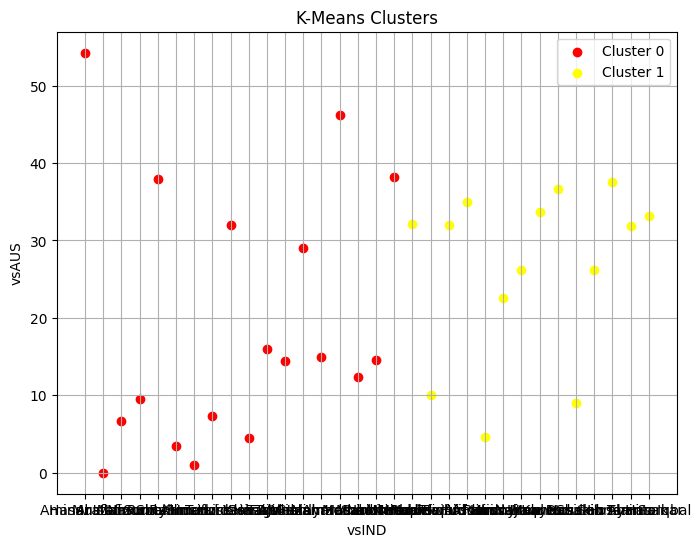

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read data from CSV file
data = file

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Perform K-means clustering with n=2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # Set random_state for reproducibility
kmeans.fit(numerical_features)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to data
data['cluster'] = cluster_labels

# Separate data by cluster labels
cluster_data = {}
for i in range(kmeans.n_clusters):
  cluster_data[i] = data[data['cluster'] == i]

# Visualize clusters in 2D graph (assuming you have two numerical features for plotting)
colors = ['red','yellow']  # Adjust colors for more clusters
plt.figure(figsize=(8, 6))
for cluster, data_subset in cluster_data.items():
  plt.scatter(data_subset.iloc[:, 0], data_subset.iloc[:, 1], label=f'Cluster {cluster}', c=colors[cluster])
plt.title('K-Means Clusters')
plt.xlabel(numerical_features.columns[0])  # Replace with actual feature name
plt.ylabel(numerical_features.columns[1])  # Replace with actual feature name
plt.legend()
plt.grid(True)
plt.show()

# Print data with cluster labels (optional)
# print(data)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read data from CSV file
data = file

# Assuming 'Player' is the column containing player names (adjust if different)
player_names = data['Player Name']  # Assuming 'Player' is the column name for player names

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Perform K-means clustering with n=2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # Set random_state for reproducibility
kmeans.fit(numerical_features)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to data
data['cluster'] = cluster_labels

# Calculate mean of column 1 (assuming numerical values) for each cluster
cluster_means = data.groupby('cluster')[numerical_features.columns[0]].mean()  # Replace 0 with actual column index

# Print players with their cluster and mean value in column 1
for i in range(kmeans.n_clusters):
  cluster_data = data[data['cluster'] == i]
  cluster_players = player_names.iloc[cluster_data.index].tolist()  # Extract player names based on cluster indices
  print(f"Cluster {i}: Mean of column 1 = {cluster_means.iloc[i]}")
  print(f"Players in Cluster {i}: {cluster_players}\n")

# ... rest of the code for visualization (optional)

# Print data with cluster labels (optional)
# print(data)


Cluster 0: Mean of column 1 = 19.015212963166665
Players in Cluster 0: ['Aminul Islam', 'Hasan Mahmud', 'Arafat Sunny', 'Mustafizur Rahman', 'Nasum Ahmed', 'Rubel Hossain', 'Shamim Hossain', 'Shoriful Islam', 'Tanzid Hasan', 'Yasir Ali', 'Sohag Gazi', 'Taijul Islam', 'Taskin Ahmed', 'Mohammad Naim', 'Mehidy Hasan Miraz', 'Mohammad Mithun', 'Mominul Haque', 'Sabbir Rahman']

Cluster 1: Mean of column 1 = 26.463333333571427
Players in Cluster 1: ['Mohammad Saifuddin', 'Mosaddek Hossain', 'Mushfiqur Rahim', 'Towhid Hridoy', 'Afif Hossain', 'Anamul Haque', 'Imrul Kayes', 'Liton Das', 'Mahmudullah', 'Najmul Hossain Shanto', 'Nasir Hossain', 'Shakib Al Hasan', 'Soumya Sarkar', 'Tamim Iqbal']



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


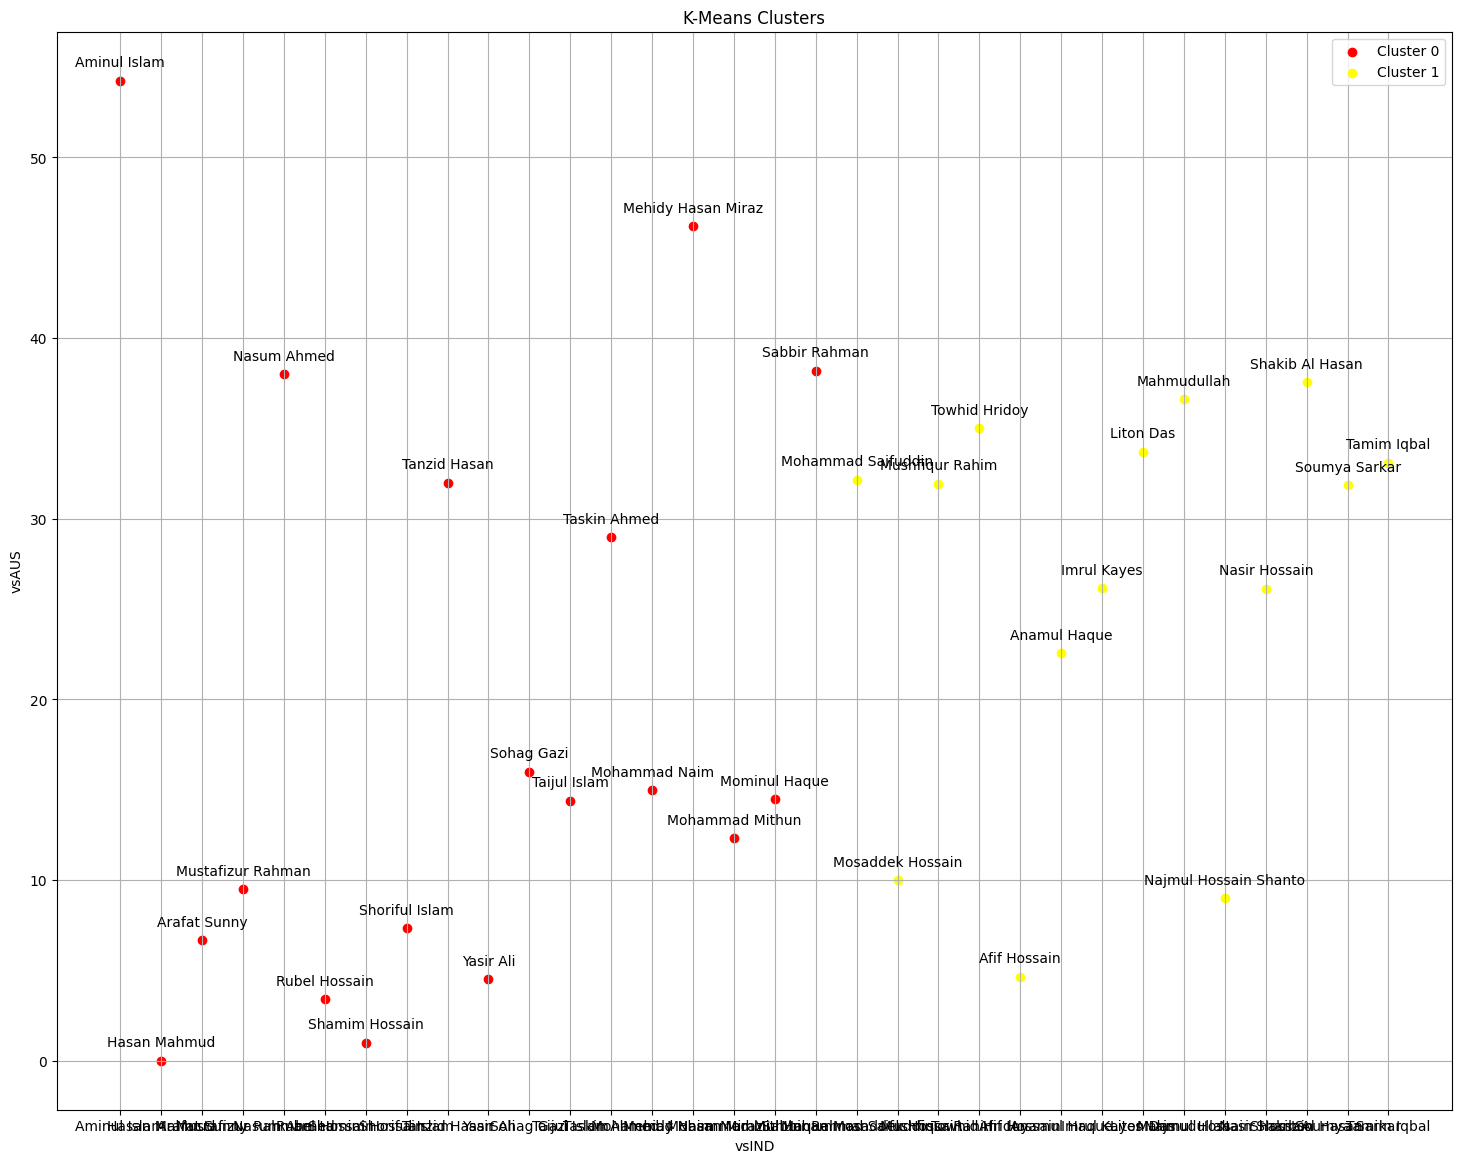

Cluster 0: Mean of column 1 = 19.015212963166665
Players in Cluster 0: ['Aminul Islam', 'Hasan Mahmud', 'Arafat Sunny', 'Mustafizur Rahman', 'Nasum Ahmed', 'Rubel Hossain', 'Shamim Hossain', 'Shoriful Islam', 'Tanzid Hasan', 'Yasir Ali', 'Sohag Gazi', 'Taijul Islam', 'Taskin Ahmed', 'Mohammad Naim', 'Mehidy Hasan Miraz', 'Mohammad Mithun', 'Mominul Haque', 'Sabbir Rahman']

Cluster 1: Mean of column 1 = 26.463333333571427
Players in Cluster 1: ['Mohammad Saifuddin', 'Mosaddek Hossain', 'Mushfiqur Rahim', 'Towhid Hridoy', 'Afif Hossain', 'Anamul Haque', 'Imrul Kayes', 'Liton Das', 'Mahmudullah', 'Najmul Hossain Shanto', 'Nasir Hossain', 'Shakib Al Hasan', 'Soumya Sarkar', 'Tamim Iqbal']



In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read data from CSV file
data = file

# Assuming 'Player Name' is the column containing player names (adjust if different)
player_names = data['Player Name']  # Assuming 'Player Name' is the column name for player names

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Perform K-means clustering with n=2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)  # Set random_state for reproducibility
kmeans.fit(numerical_features)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to data
data['cluster'] = cluster_labels

# Visualize clusters in 2D graph with player names
colors = ['red','yellow']  # Adjust colors for more clusters
plt.figure(figsize=(18, 14))
for cluster, data_subset in data.groupby('cluster'):
  plt.scatter(data_subset.iloc[:, 0], data_subset.iloc[:, 1], label=f'Cluster {cluster}', c=colors[cluster])
  for i, txt in enumerate(player_names.iloc[data_subset.index]):
    plt.annotate(txt, (data_subset.iloc[i, 0], data_subset.iloc[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')  # Adjust offset as needed

plt.title('K-Means Clusters')
plt.xlabel(numerical_features.columns[0])  # Replace with actual feature name
plt.ylabel(numerical_features.columns[1])  # Replace with actual feature name
plt.legend()
plt.grid(True)
plt.show()

# ... rest of the code for printing players (optional)
# Print players with their cluster and mean value in column 1
for i in range(kmeans.n_clusters):
  cluster_data = data[data['cluster'] == i]
  cluster_players = player_names.iloc[cluster_data.index].tolist()  # Extract player names based on cluster indices
  print(f"Cluster {i}: Mean of column 1 = {cluster_means.iloc[i]}")
  print(f"Players in Cluster {i}: {cluster_players}\n")
# Print data with cluster labels (optional)
# print(data)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read data from CSV file
data = file  # Replace with the actual path to your CSV file

# Assuming 'Player Name' is the column containing player names (adjust if different)
player_names = data['Player Name']  # Assuming 'Player Name' is the column name for player names

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Function to perform K-means clustering with silhouette analysis
def kmeans_with_silhouette(data, n_clusters_range):
  """
  Performs K-means clustering with a range of cluster numbers and calculates silhouette score for each.

  Args:
      data: The pandas DataFrame containing the data to be clustered.
      n_clusters_range: A list or range of integers representing the number of clusters to try.

  Returns:
      The KMeans model with the highest silhouette score, its cluster labels, and the corresponding silhouette score.
  """
  silhouette_scores = []
  best_kmeans = None
  best_silhouette_score = None

  for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Set random_state for reproducibility
    kmeans.fit(numerical_features)
    cluster_labels = kmeans.labels_

    # Calculate silhouette score for this k value
    silhouette_score_k = silhouette_score(numerical_features, cluster_labels)
    silhouette_scores.append(silhouette_score_k)

    if best_silhouette_score is None or silhouette_score_k > best_silhouette_score:
      best_silhouette_score = silhouette_score_k
      best_kmeans = kmeans

  return best_kmeans, best_kmeans.labels_, best_silhouette_score

# Example usage: Try a range of 2 to 5 clusters
n_clusters_range = range(2, 10)  # Adjust the range as needed

# Perform K-means clustering with silhouette analysis
best_kmeans, cluster_labels, silhouette_score = kmeans_with_silhouette(data, n_clusters_range)

# Print silhouette score
print(f"Silhouette Score for {best_kmeans.n_clusters} clusters: {silhouette_score:.4f}")

# Add cluster labels to data
data['cluster'] = cluster_labels

# Visualize clusters (optional)
# ... (Rest of your code for visualization with player names remains the same)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for 3 clusters: 0.3128


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read data from CSV file
data = file  # Replace with the actual path to your CSV file

# Assuming 'Player Name' is the column containing player names (adjust if different)
player_names = data['Player Name']  # Assuming 'Player Name' is the column name for player names

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Perform K-means clustering with n=2 clusters
n_clusters = 2  # Set the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Set random_state for reproducibility
kmeans.fit(numerical_features)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Calculate silhouette score
silhouette_score_k = silhouette_score(numerical_features, cluster_labels)
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_score_k:.4f}")

# Add cluster labels to data
# data['cluster'] = cluster_labels

# Visualize clusters (optional)
# ... (Rest of your code for visualization with player names remains the same)

# ... rest of the code for printing players (optional)
# Print players with their cluster and mean value in column 1
# for i in range(n_clusters):
#     cluster_data = data[data['cluster'] == i]
#     cluster_players = player_names.iloc[cluster_data.index].tolist()  # Extract player names based on cluster indices

#     # Select numerical columns only (assuming you have other numerical columns)
#     numerical_data = cluster_data.select_dtypes(include=[np.number])

#     print(f"Cluster {i}: Mean of numerical columns = {numerical_data.mean(axis=0)}")
#     print(f"Players in Cluster {i}: {cluster_players}\n")

# Print data with cluster labels (optional)
# print(data)


Silhouette Score for 2 clusters: 0.2938


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Heirarchical Clustering**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Read data from CSV file
data = file # Replace "your_file.csv" with the path to your CSV file

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (optional but recommended for hierarchical clustering)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Perform hierarchical clustering with n=3 clusters
n_clusters = 3  # Number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)

# Print cluster labels
print("Cluster labels:", cluster_labels)

# (Optional) Add cluster labels to data
data['cluster'] = cluster_labels

# Print data with cluster labels (optional)
# print(data)


Cluster labels: [0 1 1 1 1 1 1 1 1 0 0 2 2 1 1 1 2 1 0 0 0 0 2 0 0 0 2 0 0 2 0 2]


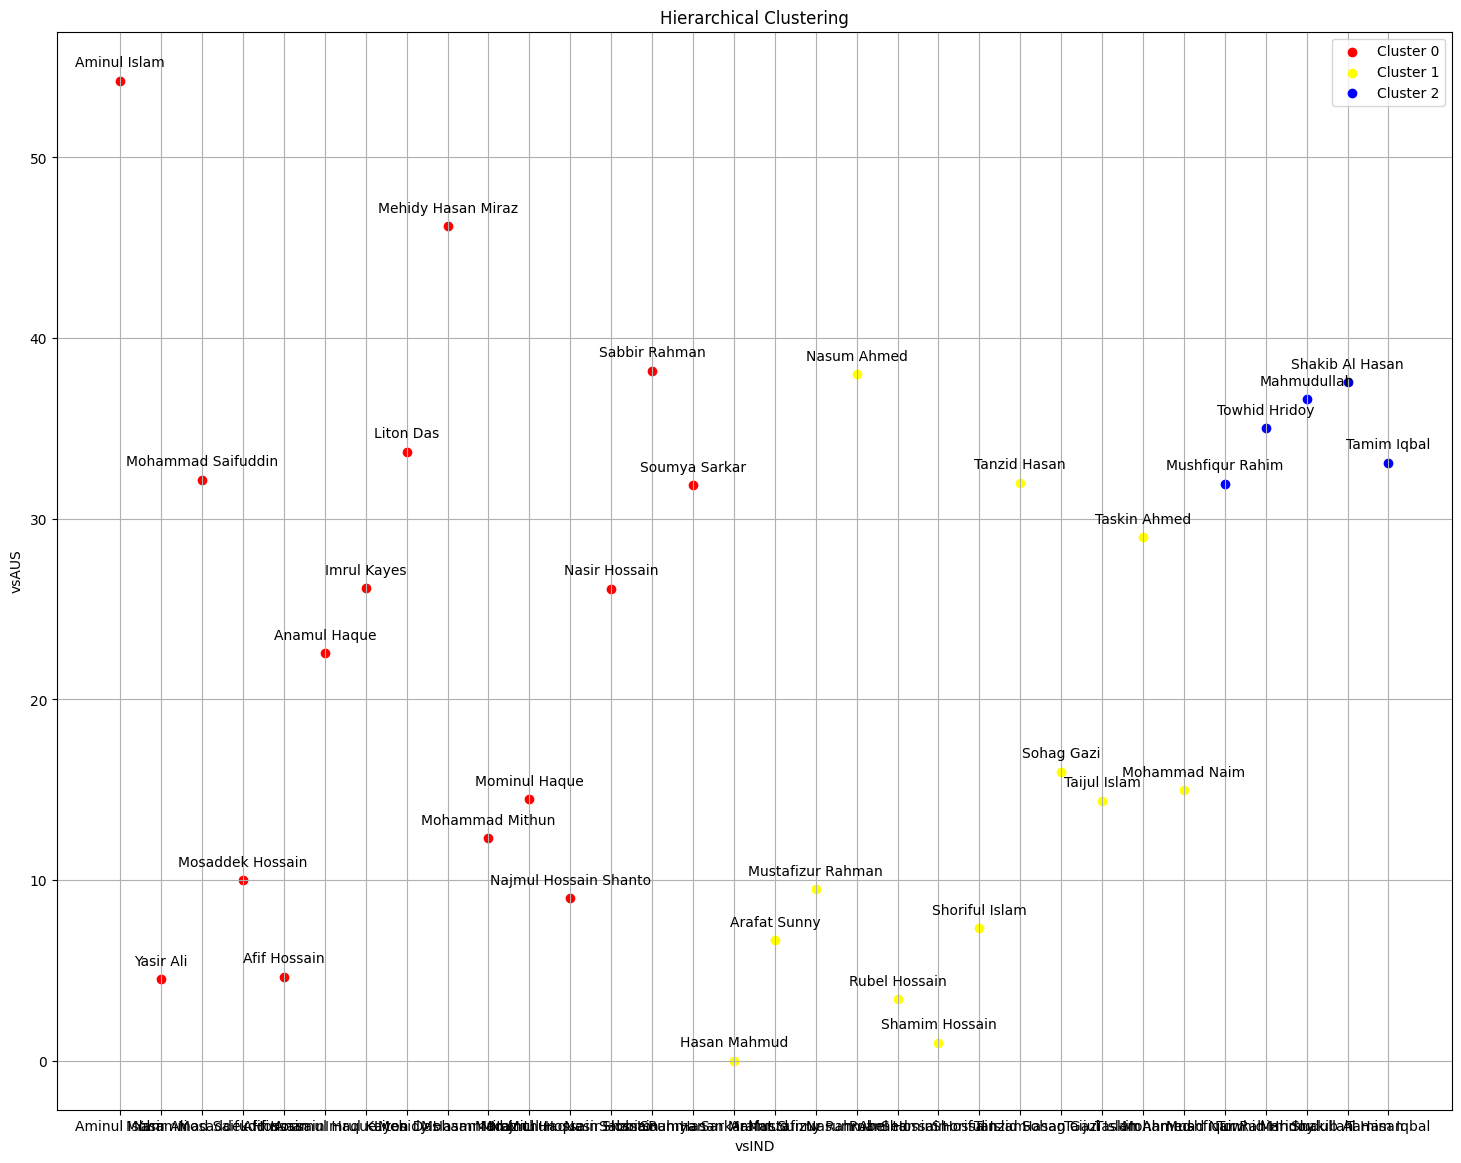

Cluster labels: [0 1 1 1 1 1 1 1 1 0 0 0 2 1 1 1 2 1 0 0 0 0 2 0 0 0 0 0 0 2 0 2]
Cluster 0: Mean of Cloumn 1 = 24.41644444466667
Players in Cluster 0: ['Aminul Islam', 'Yasir Ali', 'Mohammad Saifuddin', 'Mosaddek Hossain', 'Afif Hossain', 'Anamul Haque', 'Imrul Kayes', 'Liton Das', 'Mehidy Hasan Miraz', 'Mohammad Mithun', 'Mominul Haque', 'Najmul Hossain Shanto', 'Nasir Hossain', 'Sabbir Rahman', 'Soumya Sarkar']

Cluster 1: Mean of Cloumn 1 = 14.35781944475
Players in Cluster 1: ['Hasan Mahmud', 'Arafat Sunny', 'Mustafizur Rahman', 'Nasum Ahmed', 'Rubel Hossain', 'Shamim Hossain', 'Shoriful Islam', 'Tanzid Hasan', 'Sohag Gazi', 'Taijul Islam', 'Taskin Ahmed', 'Mohammad Naim']

Cluster 2: Mean of Cloumn 1 = 34.844
Players in Cluster 2: ['Mushfiqur Rahim', 'Towhid Hridoy', 'Mahmudullah', 'Shakib Al Hasan', 'Tamim Iqbal']



In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read data from CSV file
data =file

# Assuming 'Player Name' is the column containing player names (adjust if different)
player_names = data['Player Name']  # Assuming 'Player Name' is the column name for player names

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (optional but recommended for hierarchical clustering)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Perform hierarchical clustering with n=3 clusters
n_clusters = 3  # Number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)

# Visualize clusters in 2D graph with player names
colors = ['red', 'yellow', 'blue']  # Adjust colors for more clusters
plt.figure(figsize=(18, 14))
for cluster, data_subset in data.groupby('cluster'):
  plt.scatter(data_subset.iloc[:, 0], data_subset.iloc[:, 1], label=f'Cluster {cluster}', c=colors[cluster])
  for i, txt in enumerate(player_names.iloc[data_subset.index]):
    plt.annotate(txt, (data_subset.iloc[i, 0], data_subset.iloc[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')  # Adjust offset as needed

plt.title('Hierarchical Clustering')
plt.xlabel(numerical_features.columns[0])  # Replace with actual feature name
plt.ylabel(numerical_features.columns[1])  # Replace with actual feature name
plt.legend()
plt.grid(True)
plt.show()

# Print cluster labels (optional)
print("Cluster labels:", cluster_labels)

# (Optional) Add cluster labels to data
data['cluster'] = cluster_labels

# Print data with cluster labels (optional)
# print(data)
cluster_means = data.groupby('cluster')[numerical_features.columns[0]].mean()

for i in range(n_clusters):
  cluster_data = data[data['cluster'] == i]
  cluster_players = player_names.iloc[cluster_data.index].tolist()  # Extract player names based on cluster indices
  print(f"Cluster {i}: Mean of Cloumn 1 = {cluster_means.iloc[i]}")
  print(f"Players in Cluster {i}: {cluster_players}\n")

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Read data from CSV file
data = file

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (recommended for hierarchical clustering)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Function to evaluate silhouette score for different numbers of clusters
def evaluate_silhouette_score(data, max_clusters):
  silhouette_scores = []
  for n_clusters in range(2, max_clusters + 1):  # Start from 2 clusters
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)
    silhouette_score_val = silhouette_score(numerical_features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_score_val)
  return silhouette_scores

# Find the number of clusters with the highest silhouette score (within a range)
max_clusters_to_evaluate = 10  # Adjust this value as needed
silhouette_scores = evaluate_silhouette_score(data, max_clusters_to_evaluate)
best_n_clusters = np.argmax(silhouette_scores) + 2  # Index starts from 0

# Perform hierarchical clustering with the chosen number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=best_n_clusters)
cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)

# Add cluster labels to the data
data['cluster'] = cluster_labels

# Print data with cluster labels
print(data)



              Player Name      vsIND      vsAUS       vsSA       vsPAK  \
0            Aminul Islam  54.250000  25.302000  25.302000   10.600000   
1            Hasan Mahmud   0.000000   5.443333  15.000000    5.443333   
2            Arafat Sunny   6.666667   6.666667   6.666667    6.666667   
3       Mustafizur Rahman   9.500000   8.416000  13.000000    2.000000   
4             Nasum Ahmed  38.000000   7.000000  19.000000   18.600000   
5           Rubel Hossain   3.400000   0.000000  16.000000   16.000000   
6          Shamim Hossain   1.000000   7.625000   7.625000   13.500000   
7          Shoriful Islam   7.332500   7.332500   8.000000    2.000000   
8            Tanzid Hasan  32.000000  36.000000  12.000000    0.000000   
9               Yasir Ali   4.500000  22.602500  18.250000   40.000000   
10     Mohammad Saifuddin  32.166667  32.166667  16.000000   32.166667   
11       Mosaddek Hossain  10.000000  28.426000  26.000000   16.000000   
12        Mushfiqur Rahim  31.950000  

<ipython-input-23-874a03bb33af>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis')(np.unique(cluster_labels))  # Using colormap for clusters
<ipython-input-23-874a03bb33af>:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_subset[1], data_subset[2], label=f'Cluster {cluster}', c=colors[cluster])


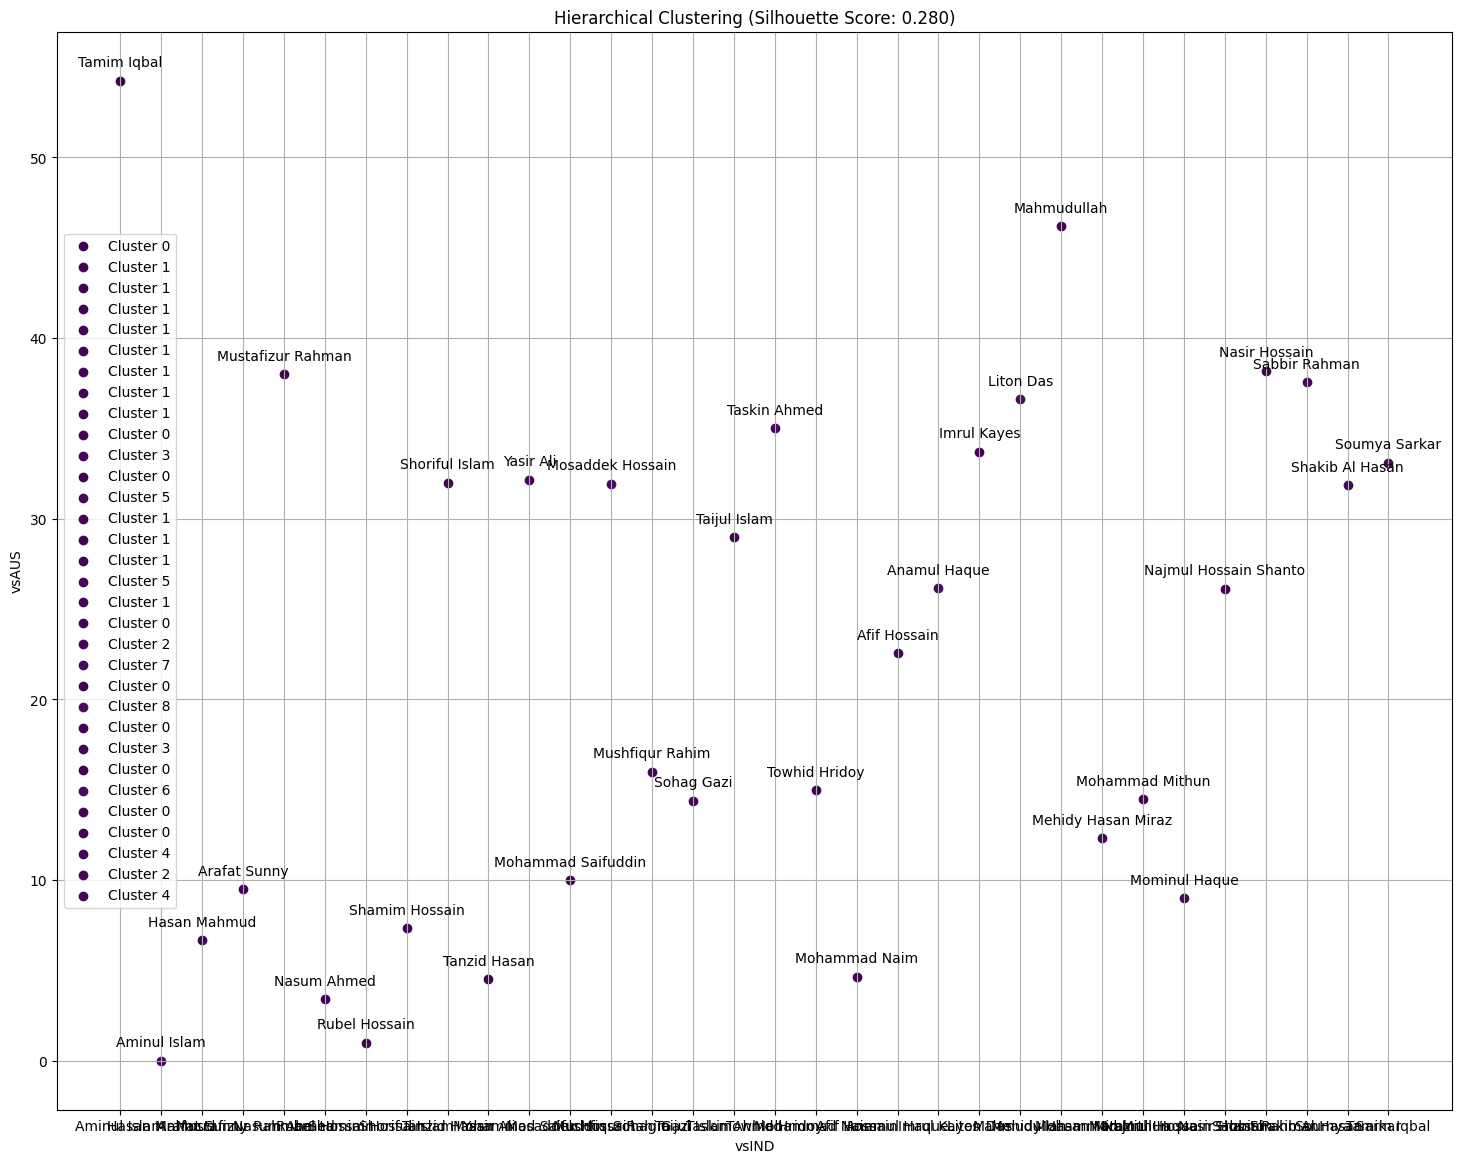

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read data from CSV file
data = file

# Assuming 'Player Name' is the column containing player names (adjust if different)
player_names = data['Player Name']  # Assuming 'Player Name' is the column name for player names

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (recommended for hierarchical clustering)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Function to evaluate silhouette score for different numbers of clusters
def evaluate_silhouette_score(data, max_clusters):
  silhouette_scores = []
  for n_clusters in range(2, max_clusters + 1):  # Start from 2 clusters
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)
    silhouette_score_val = silhouette_score(numerical_features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_score_val)
  return silhouette_scores

# Find the number of clusters with the highest silhouette score (within a range)
max_clusters_to_evaluate = 10  # Adjust this value as needed
silhouette_scores = evaluate_silhouette_score(data, max_clusters_to_evaluate)
best_n_clusters = np.argmax(silhouette_scores) + 2  # Index starts from 0

# Perform hierarchical clustering with the chosen number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=best_n_clusters)
cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)

# Visualize clusters in 2D graph with player names
colors = plt.cm.get_cmap('viridis')(np.unique(cluster_labels))  # Using colormap for clusters
plt.figure(figsize=(18, 14))
for cluster, data_subset in zip(cluster_labels, data.itertuples()):
  plt.scatter(data_subset[1], data_subset[2], label=f'Cluster {cluster}', c=colors[cluster])
  player_name = player_names.iloc[data_subset[0] - 1]  # Access player name using index from data_subset
  plt.annotate(player_name, (data_subset[1:3]),  # Annotate with player name
               textcoords="offset points", xytext=(0, 10), ha='center')  # Adjust offset as needed

plt.title(f'Hierarchical Clustering (Silhouette Score: {silhouette_scores[np.argmax(silhouette_scores)]:.3f})')
plt.xlabel(numerical_features.columns[0])  # Replace with actual feature name
plt.ylabel(numerical_features.columns[1])  # Replace with actual feature name
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read data from CSV file (replace with your actual file path)
data = file

# Assuming 'Player Name' is the column containing player names (adjust if different)
player_names = data['Player Name']  # Assuming 'Player Name' is the column name for player names

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (recommended for hierarchical clustering)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Function to evaluate silhouette score for different numbers of clusters
def evaluate_silhouette_score(data, max_clusters):
  silhouette_scores = []
  for n_clusters in range(2, max_clusters + 1):  # Start from 2 clusters
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)
    silhouette_score_val = silhouette_score(numerical_features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_score_val)
  return silhouette_scores

# Find the number of clusters with the highest silhouette score (within a range)
max_clusters_to_evaluate = 10  # Adjust this value as needed
silhouette_scores = evaluate_silhouette_score(data, max_clusters_to_evaluate)
best_n_clusters = np.argmax(silhouette_scores) + 2  # Index starts from 0

# Perform hierarchical clustering with the chosen number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=best_n_clusters)
cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)

# Visualize clusters in 2D graph with player names
colors = plt.cm.get_cmap('tab20')(np.unique(cluster_labels))  # Using 'tab20' colormap for more distinct colors
plt.figure(figsize=(18, 14))
for cluster, data_subset in zip(cluster_labels, data.itertuples()):

  # Jittering (adding small random noise for better visualization)
  from random import random
  player_name = player_names.iloc[data_subset[0] - 1]  # Access player name using index from data_subset
jittered_x_str = str(jittered_x[0])  # Convert jittered_x[0] (first element) to string
jittered_y_str = str(jittered_y[0])  # Convert jittered_y[0] to string
plt.annotate(player_name, (jittered_x_str, jittered_y_str),  # Annotate with player name (using strings)
             textcoords="offset points", xytext=(0, 10), ha='center')  # Adjust offset as needed

plt.title(f'Hierarchical Clustering (Silhouette Score: {silhouette_scores[np.argmax(silhouette_scores)]:.3f})')
plt.xlabel(numerical_features.columns[0])  # Replace with actual feature name
plt.ylabel(numerical_features.columns[1])  # Replace with actual feature name
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-24-0c2c588b3a87>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20')(np.unique(cluster_labels))  # Using 'tab20' colormap for more distinct colors


TypeError: can only concatenate str (not "float") to str

<Figure size 1800x1400 with 0 Axes>

# **Agglomerative Clustering (Bottom-Up)**

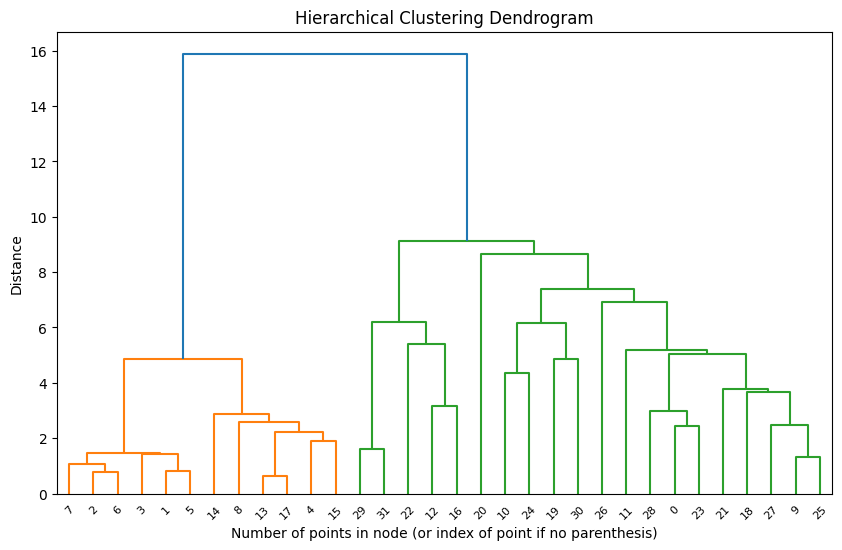

Cluster labels: [0 1 1 1 1 1 1 1 1 0 0 0 2 1 1 1 2 1 0 0 0 0 2 0 0 0 0 0 0 2 0 2]
         Player Name      vsIND      vsAUS       vsSA      vsPAK       vsNZ  \
0       Aminul Islam  54.250000  25.302000  25.302000  10.600000  25.302000   
1       Hasan Mahmud   0.000000   5.443333  15.000000   5.443333   0.660000   
2       Arafat Sunny   6.666667   6.666667   6.666667   6.666667   6.666667   
3  Mustafizur Rahman   9.500000   8.416000  13.000000   2.000000   3.000000   
4        Nasum Ahmed  38.000000   7.000000  19.000000  18.600000  14.000000   

       vsENG       vsSL   vsAFG       vsWI      vsSCO  vsZIM      vsIRE  \
0  25.302000  20.330000  25.302  33.000000  25.302000   8.33  25.302000   
1   5.443333   5.443333  12.000   5.443333   5.443333   0.00   5.000000   
2   6.666667   9.000000   0.000   6.666667   6.666667  11.00   6.666667   
3   1.500000  10.660000  11.000   8.416000   8.416000  12.50   1.000000   
4  18.600000  15.000000  18.600  18.600000  18.600000  18.60  18.600

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# ... (rest of your code for data loading, feature selection, and standardization)
data = file

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (optional but recommended for hierarchical clustering)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)
# Perform hierarchical clustering (without specifying n_clusters)
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)  # No pre-defined number of clusters
cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)

# Create the linkage matrix
linkage_matrix = linkage(numerical_features_scaled, method='ward')  # 'ward' is a common linkage method

# Generate the dendrogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
dendrogram(linkage_matrix)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# ... (rest of your code for printing cluster labels and adding them to data)
print("Cluster labels:", cluster_labels)

# Add cluster labels as a new column to the data
data['cluster'] = cluster_labels

# Print the data with the added cluster column (optional)
print(data.head())

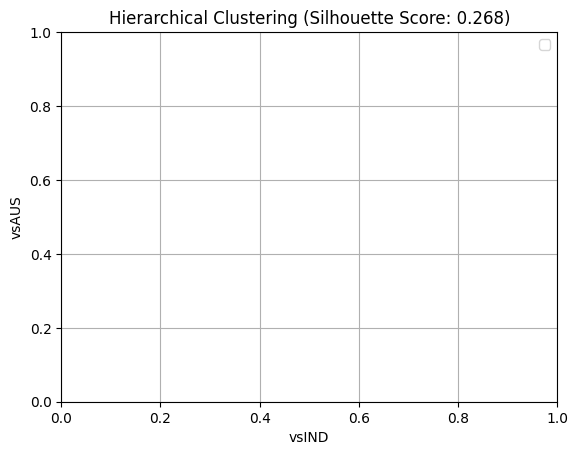

Cluster labels: [0 1 1 1 1 1 1 1 1 0 3 0 2 1 1 1 2 1 0 4 7 0 8 0 3 0 5 0 0 6 4 6]


KeyError: 'cluster'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read data from CSV file
data = file

# Assuming 'Player Name' is the column containing player names (adjust if different)
player_names = data['Player Name']  # Assuming 'Player Name' is the column name for player names

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (recommended for hierarchical clustering)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Function to evaluate silhouette score for different cluster numbers
def evaluate_silhouette_score(data, max_clusters):
  silhouette_scores = []
  for n_clusters in range(2, max_clusters + 1):
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)
    silhouette_score_val = silhouette_score(numerical_features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_score_val)
  return silhouette_scores

# Find the number of clusters with the highest silhouette score (up to a limit)
max_clusters_to_evaluate = 10  # Adjust this value as needed
silhouette_scores = evaluate_silhouette_score(data, max_clusters_to_evaluate)
best_n_clusters = np.argmax(silhouette_scores) + 2  # +2 to account for starting at 2

# Perform hierarchical clustering with the chosen number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=best_n_clusters)
cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)

# Visualize clusters in 2D graph with player names
# colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, best_n_clusters))  # Using colormap for multiple clusters
# plt.figure(figsize=(18, 14))
# for cluster, data_subset in zip(cluster_labels, data.itertuples()):
#   if isinstance(data_subset, pd.DataFrame):
#     silhouette_score_val = silhouette_score(data_subset.iloc[:, 0:2].reshape(1, -1), 2)
#     player_name = player_names.iloc[data_subset.index[0]]  # Access using first index
#   else:
#     silhouette_score_val = silhouette_score(data_subset[0:2].reshape(1, -1), 2)
#     player_name = player_names.iloc[data_subset[0] - 1]

#   player_name = player_names.iloc[data_subset[0] - 1]  # Access player name using index from data_subset
#   plt.annotate(player_name, (data_subset[1:3], silhouette_score_val),  # Annotate with calculated silhouette score
#                textcoords="offset points", xytext=(0, 10), ha='center')  # Adjust offset as needed


plt.title(f'Hierarchical Clustering (Silhouette Score: {silhouette_scores[best_n_clusters-2]:.3f})')  # Include silhouette score
plt.xlabel(numerical_features.columns[0])  # Replace with actual feature name
plt.ylabel(numerical_features.columns[1])  # Replace with actual feature name
plt.legend()
plt.grid(True)
plt.show()

# Print cluster labels (optional)
print("Cluster labels:", cluster_labels)

# (Optional) Add cluster labels to data (not used in this approach)
# data['cluster'] = cluster_labels

# Print data with cluster labels (optional)
# print(data)
cluster_means = data.groupby('cluster')[numerical_features.columns[0]].mean()

for i in range(best_n_clusters):
  cluster_data = data[data['cluster'] == i]
  cluster_players = player_names.iloc[cluster_data.index].tolist()  # Extract player names based on cluster indices
  print(f"Cluster {i}: Mean of Column 1 = {cluster_means.iloc[i]}")
  print(f"Players in Cluster {i}: {cluster_players}\n")



# **DBSCAN Clustering**

<ipython-input-15-8d191fc3dc10>:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis')(np.unique(cluster_labels))  # Using colormap for clusters


NameError: name 'numerical' is not defined

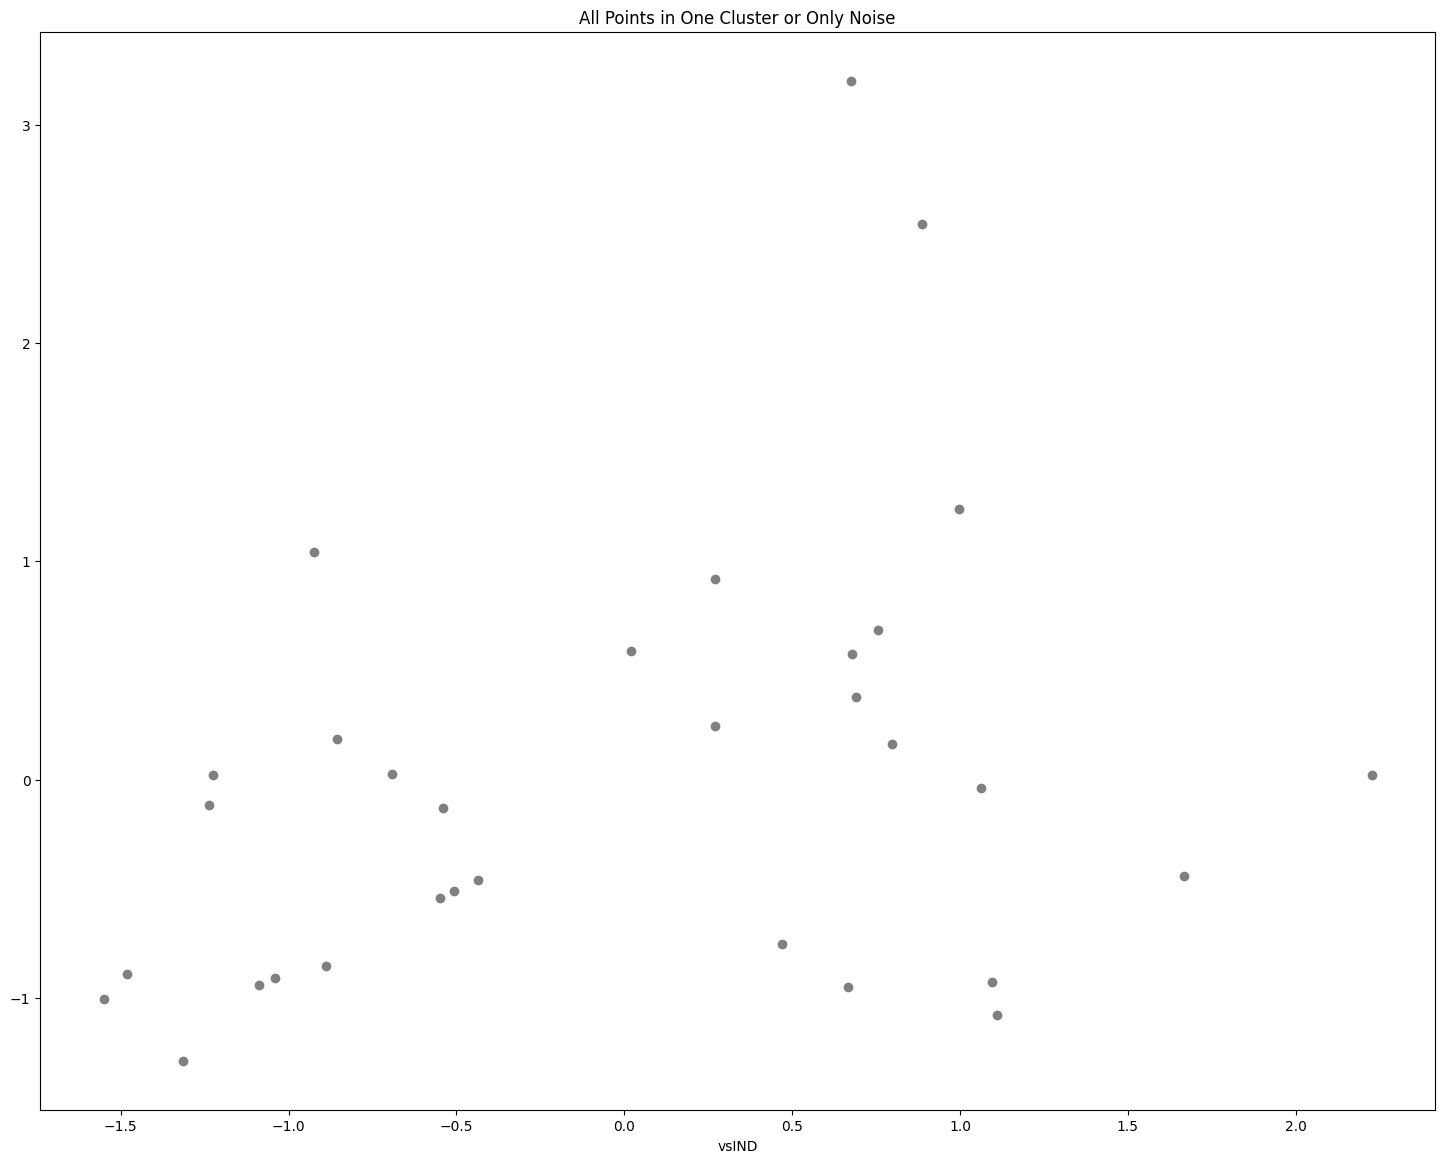

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read data from CSV file
data = file


# Assuming 'Player Name' is the column containing player names (adjust if different)
player_names = data['Player Name']  # Assuming 'Player Name' is the column name for player names

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (recommended for DBSCAN)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Function to evaluate silhouette score for different eps values (handling single cluster case)
def evaluate_silhouette_score(data, eps_range):
  silhouette_scores = []
  for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=5)  # Adjust min_samples as needed
    cluster_labels = dbscan.fit_predict(numerical_features_scaled)
    # Check if all data points are in the same cluster (or only noise)
    if len(np.unique(cluster_labels)) <= 1:
      silhouette_score_val = 0.0  # Assign 0 silhouette score in this case (optional)
    else:
      silhouette_score_val = silhouette_score(numerical_features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_score_val)
  return silhouette_scores

# Find the eps value with the highest silhouette score (within a range)
max_eps_to_evaluate = 2.0  # Adjust this value as needed
eps_range = np.arange(0.1, max_eps_to_evaluate, 0.1)  # Adjust step size for eps values
silhouette_scores = evaluate_silhouette_score(data, eps_range)
best_eps = eps_range[np.argmax(silhouette_scores)]

# Perform DBSCAN clustering with the chosen eps value
dbscan = DBSCAN(eps=best_eps, min_samples=10)  # Adjust min_samples as needed
cluster_labels = dbscan.fit_predict(numerical_features_scaled)

# Visualize clusters in 2D graph with player names (handle single cluster case)
colors = plt.cm.get_cmap('viridis')(np.unique(cluster_labels))  # Using colormap for clusters
plt.figure(figsize=(18, 14))
if len(np.unique(cluster_labels)) <= 1:  # If all points in one cluster or only noise
  plt.scatter(numerical_features_scaled[:, 0], numerical_features_scaled[:, 1], c='gray')  # Use a single color
  plt.title('All Points in One Cluster or Only Noise')
else:
  for cluster, data_subset in zip(cluster_labels, data.itertuples()):
    if cluster == -1:  # Consider separate color for noise points
      color = 'gray'
    else:
      color = colors[cluster]
    silhouette_score_val = silhouette_score(data_subset[1:3].reshape(1, -1), 2)  # Reshape for single point
    plt.scatter(data_subset[1], data_subset[2], label=f'Cluster {cluster}', c=color)
    player_name = player_names.iloc[data_subset[0] - 1]  # Access player name using index from data_subset
    plt.annotate(player_name, (data_subset[1:3], silhouette_score_val),  # Annotate with silhouette score
                 textcoords="offset points", xytext=(0, 10), ha='center')  # Adjust offset as needed

plt.xlabel(numerical_features.columns[0])  # Replace with actual feature name
plt.ylabel(numerical)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Read data from CSV file
data = file  # Replace "your_file.csv" with the path to your CSV file

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (required for DBSCAN)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=5)  # You may need to adjust eps and min_samples based on your data
cluster_labels = dbscan.fit_predict(numerical_features_scaled)

# Print cluster labels
print("Cluster labels:", cluster_labels)

# (Optional) Add cluster labels to data
data['cluster'] = cluster_labels

# Print data with cluster labels (optional)
print(data)


Cluster labels: [-1  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0 -1  0 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1]
              Player Name      vsIND      vsAUS       vsSA       vsPAK  \
0            Aminul Islam  54.250000  25.302000  25.302000   10.600000   
1            Hasan Mahmud   0.000000   5.443333  15.000000    5.443333   
2            Arafat Sunny   6.666667   6.666667   6.666667    6.666667   
3       Mustafizur Rahman   9.500000   8.416000  13.000000    2.000000   
4             Nasum Ahmed  38.000000   7.000000  19.000000   18.600000   
5           Rubel Hossain   3.400000   0.000000  16.000000   16.000000   
6          Shamim Hossain   1.000000   7.625000   7.625000   13.500000   
7          Shoriful Islam   7.332500   7.332500   8.000000    2.000000   
8            Tanzid Hasan  32.000000  36.000000  12.000000    0.000000   
9               Yasir Ali   4.500000  22.602500  18.250000   40.000000   
10     Mohammad Saifuddin  32.166667  32.166667  16.000000   32.166667 

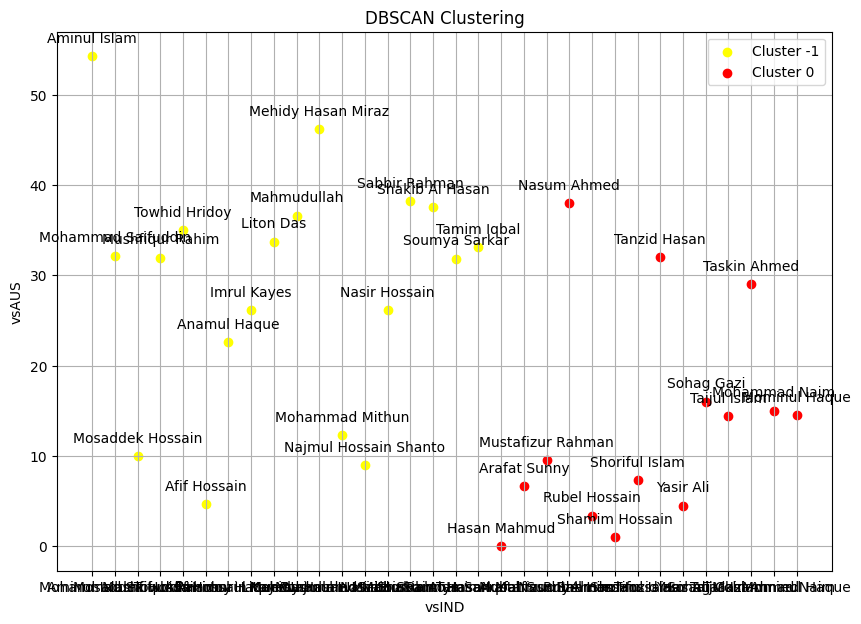

Cluster labels: [-1  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0 -1  0 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1]
Cluster -1: ['Aminul Islam', 'Mohammad Saifuddin', 'Mosaddek Hossain', 'Mushfiqur Rahim', 'Towhid Hridoy', 'Afif Hossain', 'Anamul Haque', 'Imrul Kayes', 'Liton Das', 'Mahmudullah', 'Mehidy Hasan Miraz', 'Mohammad Mithun', 'Najmul Hossain Shanto', 'Nasir Hossain', 'Sabbir Rahman', 'Shakib Al Hasan', 'Soumya Sarkar', 'Tamim Iqbal']
Cluster 0: ['Hasan Mahmud', 'Arafat Sunny', 'Mustafizur Rahman', 'Nasum Ahmed', 'Rubel Hossain', 'Shamim Hossain', 'Shoriful Islam', 'Tanzid Hasan', 'Yasir Ali', 'Sohag Gazi', 'Taijul Islam', 'Taskin Ahmed', 'Mohammad Naim', 'Mominul Haque']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read data from CSV file
data = file

# Assuming 'Name' is the column containing data point names (adjust if different)
data_point_names = data['Player Name']  # Assuming 'Name' is the column name

# Select columns containing numerical features (assuming you want to cluster based on numerical values)
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (recommended for DBSCAN)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=5)  # You may need to adjust eps and min_samples based on your data
cluster_labels = dbscan.fit_predict(numerical_features_scaled)

# Add cluster labels to data
data['cluster'] = cluster_labels  # Moved this line after cluster label assignment

# Visualize clusters in 2D graph with data point names
colors = ['red', 'yellow']  # Adjust colors for more clusters
plt.figure(figsize=(10, 7))
for cluster, data_subset in data.groupby('cluster'):
    plt.scatter(data_subset.iloc[:, 0], data_subset.iloc[:, 1], label=f'Cluster {cluster}', c=colors[cluster])
    for i, txt in enumerate(data_point_names.iloc[data_subset.index]):
        plt.annotate(txt, (data_subset.iloc[i, 0], data_subset.iloc[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')  # Adjust offset as needed

plt.title('DBSCAN Clustering')
plt.xlabel(numerical_features.columns[0])  # Replace with actual feature name
plt.ylabel(numerical_features.columns[1])  # Replace with actual feature name
plt.legend()
plt.grid(True)
plt.show()

# Print cluster labels (optional)
print("Cluster labels:", cluster_labels)

# Create a list of data point names per cluster (optional)
cluster_names_list = {}
for i in range(len(cluster_labels)):
  if cluster_labels[i] not in cluster_names_list.keys():
    cluster_names_list[cluster_labels[i]] = []
  cluster_names_list[cluster_labels[i]].append(data_point_names.iloc[i])

# Print data point names per cluster (optional)
for cluster, names in cluster_names_list.items():
  print(f"Cluster {cluster}: {names}")


# **PCA Algorithm**

# **for K means**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Read data from CSV file
data = file

# Select columns containing numerical features
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the data (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Create a PCA object with the desired number of components
pca = PCA(n_components=2)  # Replace 2 with the desired number of components

# Fit the PCA object to the data
pca.fit(scaled_data)

# Transform the data to the principal components
principal_components = pca.transform(scaled_data)

# Print the principal components
print(principal_components)

# You can also access the explained variance ratio of each component
explained_variance = pca.explained_variance_ratio_
# print(explained_variance)


[[ 2.58945706e-01 -3.05587301e-01]
 [-3.69105269e+00 -6.36005488e-02]
 [-3.47662215e+00 -1.64154888e-01]
 [-3.28721526e+00  3.39245191e-01]
 [-1.21462113e+00 -2.52920821e-01]
 [-3.50786889e+00 -1.61707318e-01]
 [-3.32048001e+00  8.14987753e-02]
 [-3.32790038e+00 -1.84727454e-01]
 [-2.30406156e+00 -1.74635957e-01]
 [-4.69327464e-01  2.01514385e-01]
 [ 1.38083678e+00  9.76814669e-01]
 [ 1.58098942e+00  1.82909865e-01]
 [ 3.39289641e+00 -7.73170418e-01]
 [-1.62190539e+00  5.11120418e-02]
 [-2.09213493e+00  2.27537092e-02]
 [-2.59599204e+00 -6.11487540e-01]
 [ 3.06034385e+00 -5.07511733e-03]
 [-1.88226202e+00 -1.02435798e-01]
 [ 6.73054335e-01  6.67263348e-01]
 [ 2.60325732e+00 -7.43216986e-01]
 [ 3.32775583e+00  5.58530917e+00]
 [ 9.84274893e-01 -6.48428539e-01]
 [ 4.76996680e+00 -1.06858887e+00]
 [-1.57478353e-01  7.31080891e-01]
 [-1.50644075e-01 -5.23940403e-01]
 [-5.57853646e-01  1.42195564e-01]
 [ 1.46602161e+00  8.96857567e-01]
 [ 1.36964955e+00  7.80661945e-01]
 [-4.50066839e-01  1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


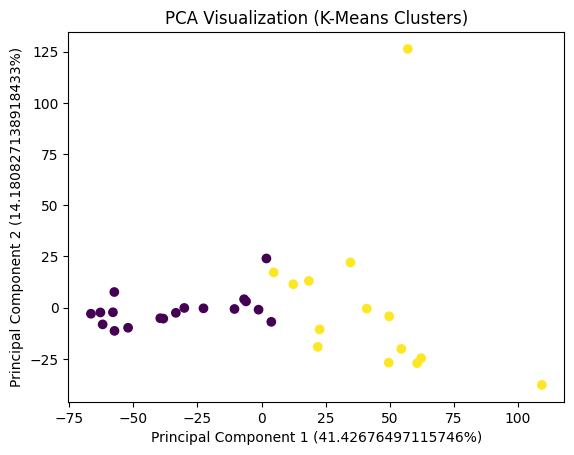

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Read data from CSV file
data = file


# Select columns containing numerical features
numerical_features = data.select_dtypes(include=[np.number])

# Perform K-means clustering with n=2 clusters (optional)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(numerical_features)
cluster_labels = kmeans.labels_

# (Optional) Add cluster labels to data
data['cluster'] = cluster_labels

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_features)

# Visualize data using scatter plot with colors based on cluster labels (if available)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')

# Label the axes based on the original features (assuming these are numeric)
plt.xlabel("Principal Component 1 (" + str(pca.explained_variance_ratio_[0]*100) + "%)")
plt.ylabel("Principal Component 2 (" + str(pca.explained_variance_ratio_[1]*100) + "%)")

# Add a title and show the plot
plt.title("PCA Visualization (K-Means Clusters)")
plt.show()


# for **DBSCAN**

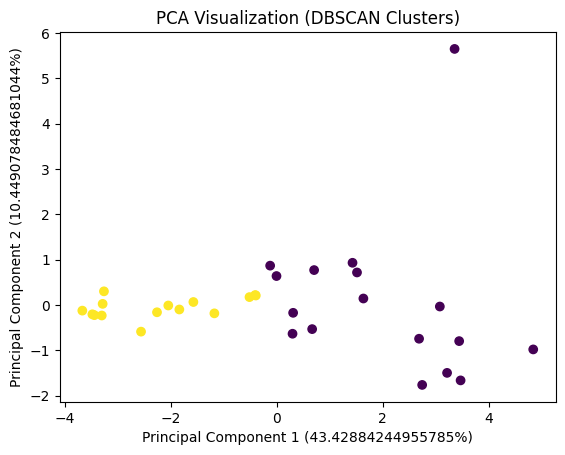

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Read data from CSV file
data = file

# Select columns containing numerical features
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (required for DBSCAN)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=15)  # You may need to adjust eps and min_samples
cluster_labels = dbscan.fit_predict(numerical_features_scaled)

# (Optional) Add cluster labels to data
data['cluster'] = cluster_labels

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_features_scaled)

# Visualize data using scatter plot with colors based on cluster labels (if available)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')

# Label the axes based on the original features (assuming these are numeric)
plt.xlabel("Principal Component 1 (" + str(pca.explained_variance_ratio_[0]*100) + "%)")
plt.ylabel("Principal Component 2 (" + str(pca.explained_variance_ratio_[1]*100) + "%)")

# Add a title and show the plot
plt.title("PCA Visualization (DBSCAN Clusters)")
plt.show()


# ***for Heirarchical ***

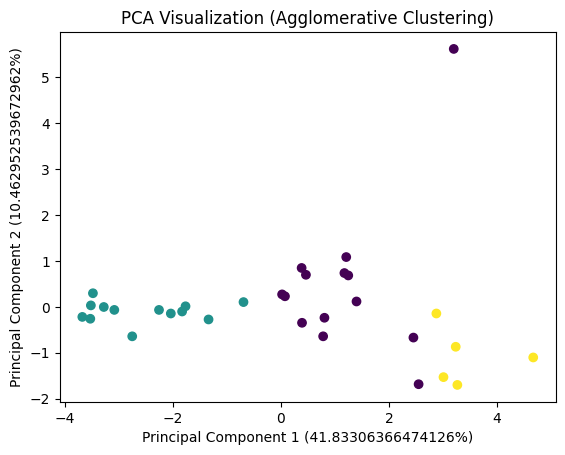

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Read data from CSV file
data = file

# Select columns containing numerical features
numerical_features = data.select_dtypes(include=[np.number])

# Standardize the numerical features (recommended for hierarchical clustering)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Perform hierarchical clustering with n clusters
n_clusters = 3  # Number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = hierarchical_clustering.fit_predict(numerical_features_scaled)

# (Optional) Add cluster labels to data
data['cluster'] = cluster_labels

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_features_scaled)

# Visualize data using scatter plot with colors based on cluster labels
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')

# Label the axes based on the original features (assuming these are numeric)
plt.xlabel("Principal Component 1 (" + str(pca.explained_variance_ratio_[0]*100) + "%)")
plt.ylabel("Principal Component 2 (" + str(pca.explained_variance_ratio_[1]*100) + "%)")

# Add a title and show the plot
plt.title("PCA Visualization (Agglomerative Clustering)")
plt.show()


# ***ExKMC***

In [ ]:
pip install ExKMC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ExKMC: filename=ExKMC-0.0.3-cp310-cp310-linux_x86_64.whl size=359260 sha256=f898c1d54bc65feb53d22d32bdd8951cb6ec0d4a6a7065537a5b6a94497288ad
  Stored in directory: /root/.cache/pip/wheels/94/c4/64/0fd49cbd5f25ec987bd87b91a940d5efb33b8171e55d5818f6
Successfully built ExKMC


In [ ]:
import os
from ExKMC.Tree import Tree
from IPython.display import Image

In [ ]:
data = file.drop(['Player Name','cluster'],axis=1)
data.head()

,vsIND,vsAUS,vsSA,vsPAK,vsNZ,vsENG,vsSL,vsAFG,vsWI,vsSCO,vsZIM,vsIRE,vsNED
0,54.250000,25.302000,25.302000,10.600000,25.302000,25.302000,20.330000,25.302,33.000000,25.302000,8.33,25.302000,25.302000
1,0.000000,5.443333,15.000000,5.443333,0.660000,5.443333,5.443333,12.000,5.443333,5.443333,0.00,5.000000,5.443333
2,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667,9.000000,0.000,6.666667,6.666667,11.00,6.666667,6.666667
3,9.500000,8.416000,13.000000,2.000000,3.000000,1.500000,10.660000,11.000,8.416000,8.416000,12.50,1.000000,20.000000
4,38.000000,7.000000,19.000000,18.600000,14.000000,18.600000,15.000000,18.600,18.600000,18.600000,18.60,18.600000,18.600000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


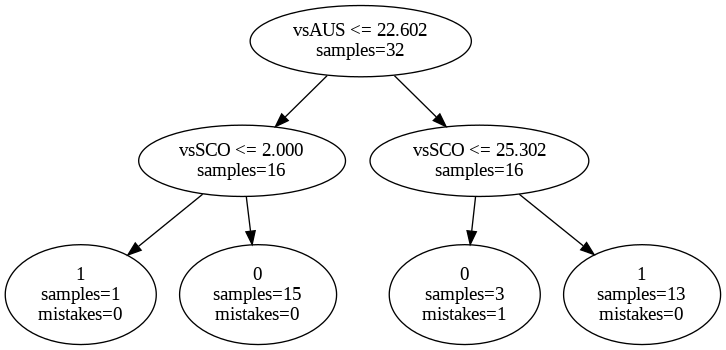

In [ ]:
categories = np.array(data.columns)
k = 2
model = KMeans(k)
model.fit(data)

tree = Tree(k=k, max_leaves=2*k)
tree.fit(data, model)

tree.plot(filename="test", feature_names=categories)
Image(filename='test.gv.png')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


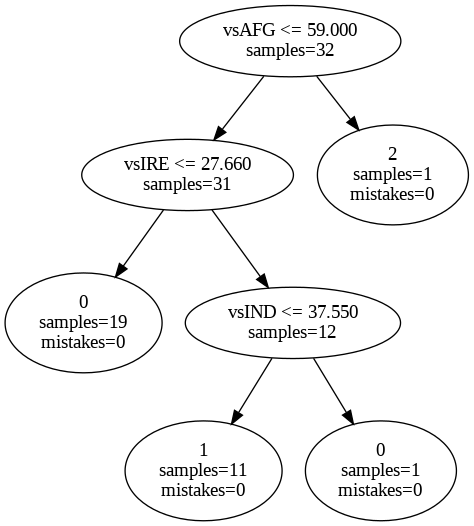

In [ ]:
categories = np.array(data.columns)
k = 3
model = KMeans(k)
model.fit(data)

tree = Tree(k=k, max_leaves=2*k)
tree.fit(data, model)

tree.plot(filename="test", feature_names=categories)
Image(filename='test.gv.png')

To:
Arif Sir
Rabiul Sir
Rafeed Sir
CC:
me
Sabbir Sir
Other Group Members
Thesis ID



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


|--- cluster <= 0.50
|   |--- class: 0
|--- cluster >  0.50
|   |--- class: 1



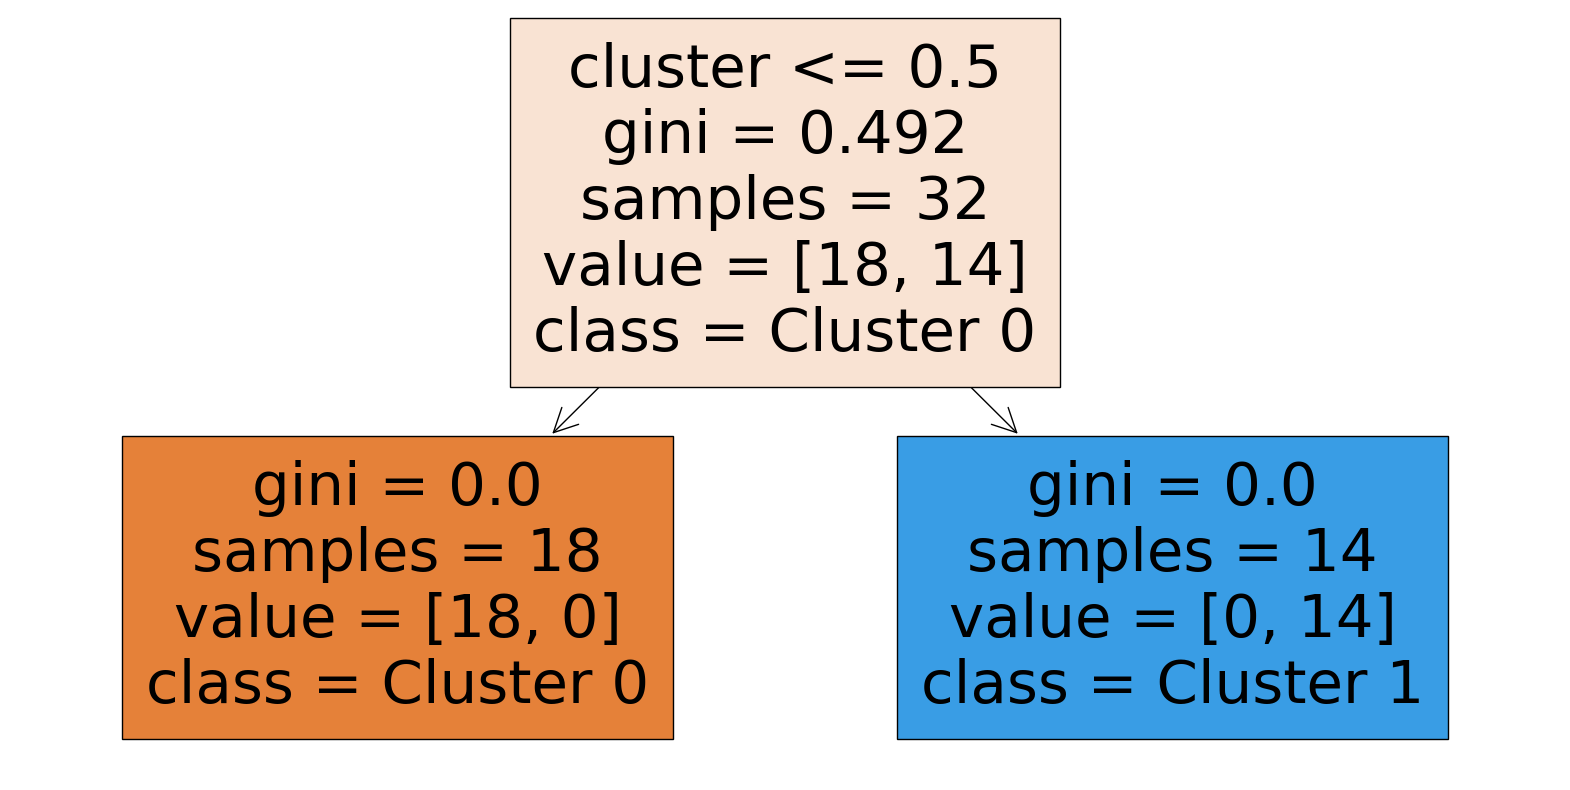

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt

# Assume 'file' is the path to your CSV file or a DataFrame
data = file # Or use data = file if 'file' is a DataFrame

# Select columns containing numerical features
numerical_features = data.select_dtypes(include=[np.number])

# Perform K-means clustering with n=2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(numerical_features)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to data
data['cluster'] = cluster_labels

# Train a decision tree classifier to explain the clusters
clf = DecisionTreeClassifier(random_state=42)
clf.fit(numerical_features, cluster_labels)

# Print the tree in textual form
tree_rules = export_text(clf, feature_names=list(numerical_features.columns))
print(tree_rules)

# Optional: Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=numerical_features.columns, class_names=['Cluster 0', 'Cluster 1'], filled=True)
plt.show()

# (Optional) Print data with cluster labels
# print(data)


The mean absolute error between the predicted and true centroids is:       6.3024
Accuracy score: 0.9615
Precision score: 0.9654
Recall score: 0.9615
F1 score: 0.9614


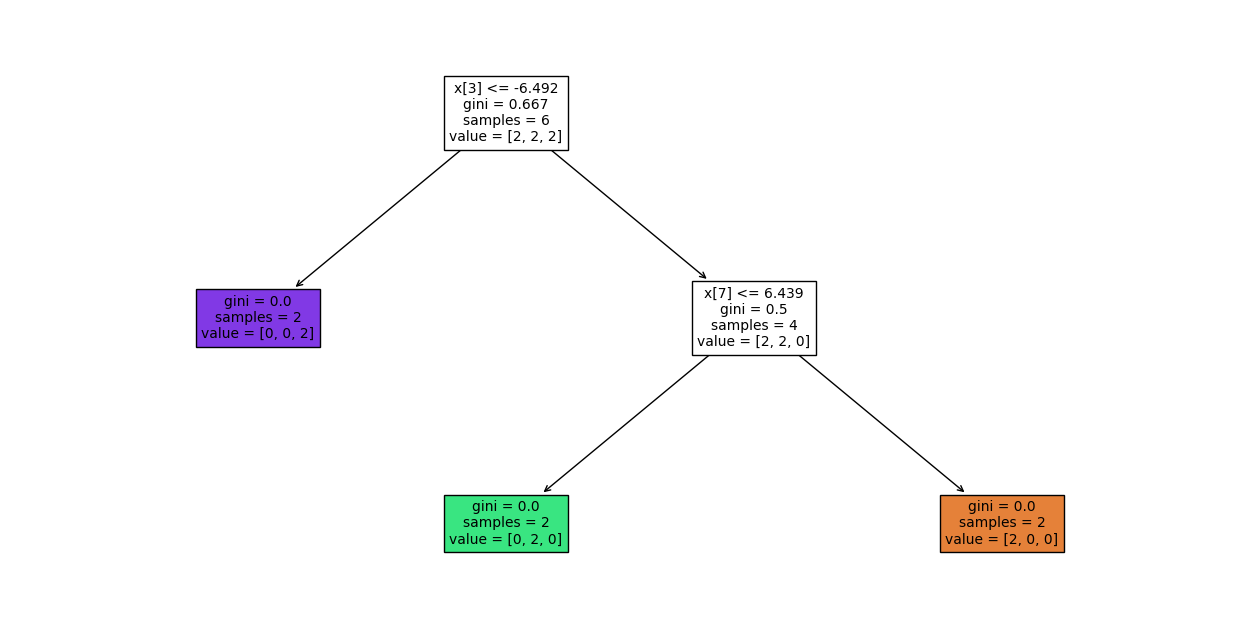

In [ ]:
# imports
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate sample data with 2 clusters and 13 features
X, y, centers = make_blobs(n_samples=32, centers=3, n_features=13, return_centers=True, random_state=42)

# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20).fit(X)
y_kmeans = kmeans.predict(X)

# Obtain predicted centroids
centers_pred = kmeans.cluster_centers_

# Calculate mean absolute error between predicted and true centroids
print(f'The mean absolute error between the predicted and true centroids is: \
      {mean_absolute_error(centers, centers_pred):.4f}')

# Train-test split (using original labels 'y')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)

# Decision tree classifier with max depth 5
clt = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train)

# Evaluate decision tree performance on test data
y_pred = clt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy score: {acc:.4f}')
print(f'Precision score: {pre:.4f}')
print(f'Recall score: {rec:.4f}')
print(f'F1 score: {f1:.4f}')

# Visualize the decision tree
fig = plt.figure(figsize=(16, 8))
_ = plot_tree(clt,
              filled=True,
              fontsize=10)
plt.show()
